<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [6]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [8]:
path_to_train = '/content/drive/MyDrive/dls_hw/14. Домашнее задание. Решение ML-задачи и kaggle/train.csv'
path_to_test = '/content/drive/MyDrive/dls_hw/14. Домашнее задание. Решение ML-задачи и kaggle/test.csv'
path_to_submission = '/content/drive/MyDrive/dls_hw/14. Домашнее задание. Решение ML-задачи и kaggle/submission.csv'
data = pd.read_csv(path_to_train)
data_test = pd.read_csv(path_to_test)

In [9]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим на первые пять строк:

In [10]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


И на случайные 10:

In [11]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
486,3,75.15,216.75,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),1
1948,13,45.30,528.45,Female,1,Yes,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,0
1786,9,99.30,918.75,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),0
3918,5,25.90,135,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),1
1091,64,81.05,5135.35,Male,0,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check,0
1000,46,110.00,4874.8,Female,1,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,1
1950,22,83.05,1799.3,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,0
2452,15,85.90,1269.55,Female,0,No,Yes,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),1
1601,69,19.10,1268.85,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,0
3708,2,19.35,46.35,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0


In [12]:
data.shape

(5282, 20)

**Кол-во наблюдений:** 5282  
**Кол-во признаков:** 20 (среди которых 1 - целевой)

### Пропущенные значения

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

TotalSpent - численная переменная. Поменяем тип колонки для удобства при дальнейшем анализе. Также заметим, что в некоторых строках значение данной переменной равно " ". Заменим его на 0:

In [14]:
data[data['TotalSpent'] == " "]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [15]:
data['TotalSpent'] = data['TotalSpent'].apply(lambda x: 0 if x == " " else x)
data_test['TotalSpent'] = data_test['TotalSpent'].apply(lambda x: 0 if x == " " else x)

data['TotalSpent'] = data['TotalSpent'].astype(float)
data_test['TotalSpent'] = data_test['TotalSpent'].astype(float)

In [17]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Пропущенных значений в таблице нет.

### Дублирующиеся строчки

In [18]:
data.duplicated().sum()

14

В датасете присутствуют дубликаты. Удалим их:

In [19]:
data = data[data.duplicated() == False]
data.shape

(5268, 20)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [20]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Численные признаки

In [21]:
num_cols

['ClientPeriod', 'MonthlySpending', 'TotalSpent']

In [22]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ClientPeriod,5268.0,32.480448,24.529439,0.00,9.0000,29.00,55.0000,72.00
MonthlySpending,5268.0,64.977563,30.176025,18.25,35.5375,70.45,90.0500,118.75
TotalSpent,5268.0,2293.445549,2269.111393,0.00,401.9250,1411.50,3808.6375,8684.80


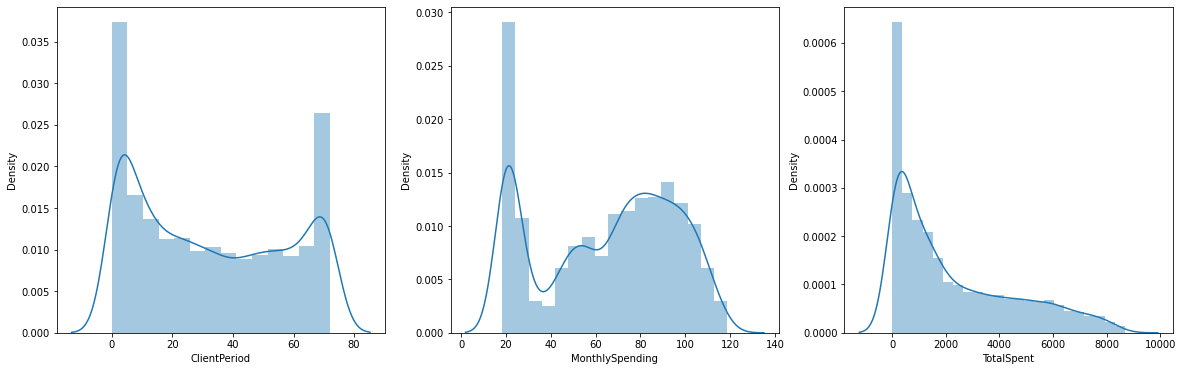

In [23]:
_, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.distplot(a=data['ClientPeriod'], ax=axes[0])
sns.distplot(a=data['MonthlySpending'], ax=axes[1])
sns.distplot(a=data['TotalSpent'], ax=axes[2])

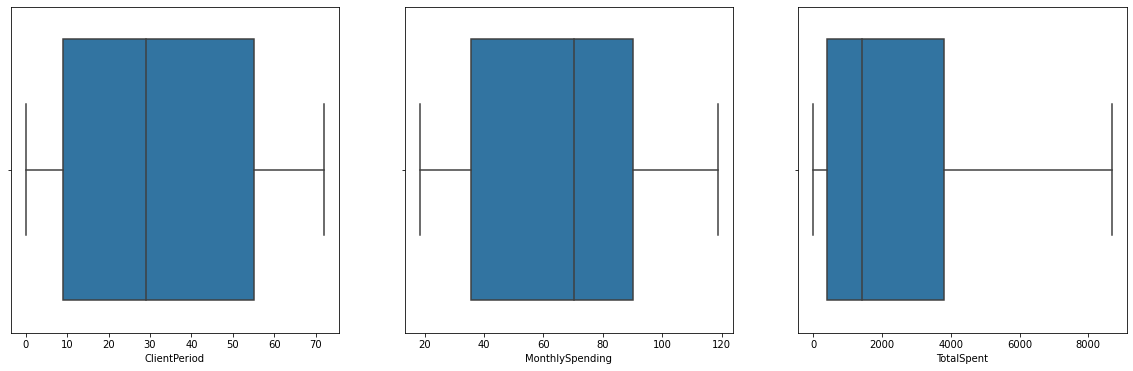

In [24]:
_, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(data=data, x='ClientPeriod', ax=axes[0])
sns.boxplot(data=data, x='MonthlySpending', ax=axes[1])
sns.boxplot(data=data, x='TotalSpent', ax=axes[2])

### Категориальные признаки

In [25]:
cat_cols

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod']

In [26]:
for cat_col in cat_cols:
    print(cat_col)
    display(
        pd.DataFrame({
    'count': data[cat_col].value_counts(),
    'frequency(%)': (data[cat_col].value_counts() / data.shape[0]) * 100
    }))

Sex


,count,frequency(%)
Male,2647,50.246773
Female,2621,49.753227


IsSeniorCitizen


,count,frequency(%)
0,4427,84.035687
1,841,15.964313


HasPartner


,count,frequency(%)
No,2691,51.082005
Yes,2577,48.917995


HasChild


,count,frequency(%)
No,3662,69.514047
Yes,1606,30.485953


HasPhoneService


,count,frequency(%)
Yes,4747,90.110099
No,521,9.889901


HasMultiplePhoneNumbers


,count,frequency(%)
No,2497,47.399393
Yes,2250,42.710706
No phone service,521,9.889901


HasInternetService


,count,frequency(%)
Fiber optic,2335,44.324222
DSL,1798,34.130600
No,1135,21.545178


HasOnlineSecurityService


,count,frequency(%)
No,2604,49.430524
Yes,1529,29.024298
No internet service,1135,21.545178


HasOnlineBackup


,count,frequency(%)
No,2324,44.115414
Yes,1809,34.339408
No internet service,1135,21.545178


HasDeviceProtection


,count,frequency(%)
No,2309,43.830676
Yes,1824,34.624146
No internet service,1135,21.545178


HasTechSupportAccess


,count,frequency(%)
No,2596,49.278664
Yes,1537,29.176158
No internet service,1135,21.545178


HasOnlineTV


,count,frequency(%)
No,2091,39.692483
Yes,2042,38.762339
No internet service,1135,21.545178


HasMovieSubscription


,count,frequency(%)
No,2073,39.350797
Yes,2060,39.104024
No internet service,1135,21.545178


HasContractPhone


,count,frequency(%)
Month-to-month,2906,55.163250
Two year,1280,24.297646
One year,1082,20.539104


IsBillingPaperless


,count,frequency(%)
Yes,3140,59.605163
No,2128,40.394837


PaymentMethod


,count,frequency(%)
Electronic check,1780,33.788914
Mailed check,1186,22.513288
Bank transfer (automatic),1159,22.000759
Credit card (automatic),1143,21.697039


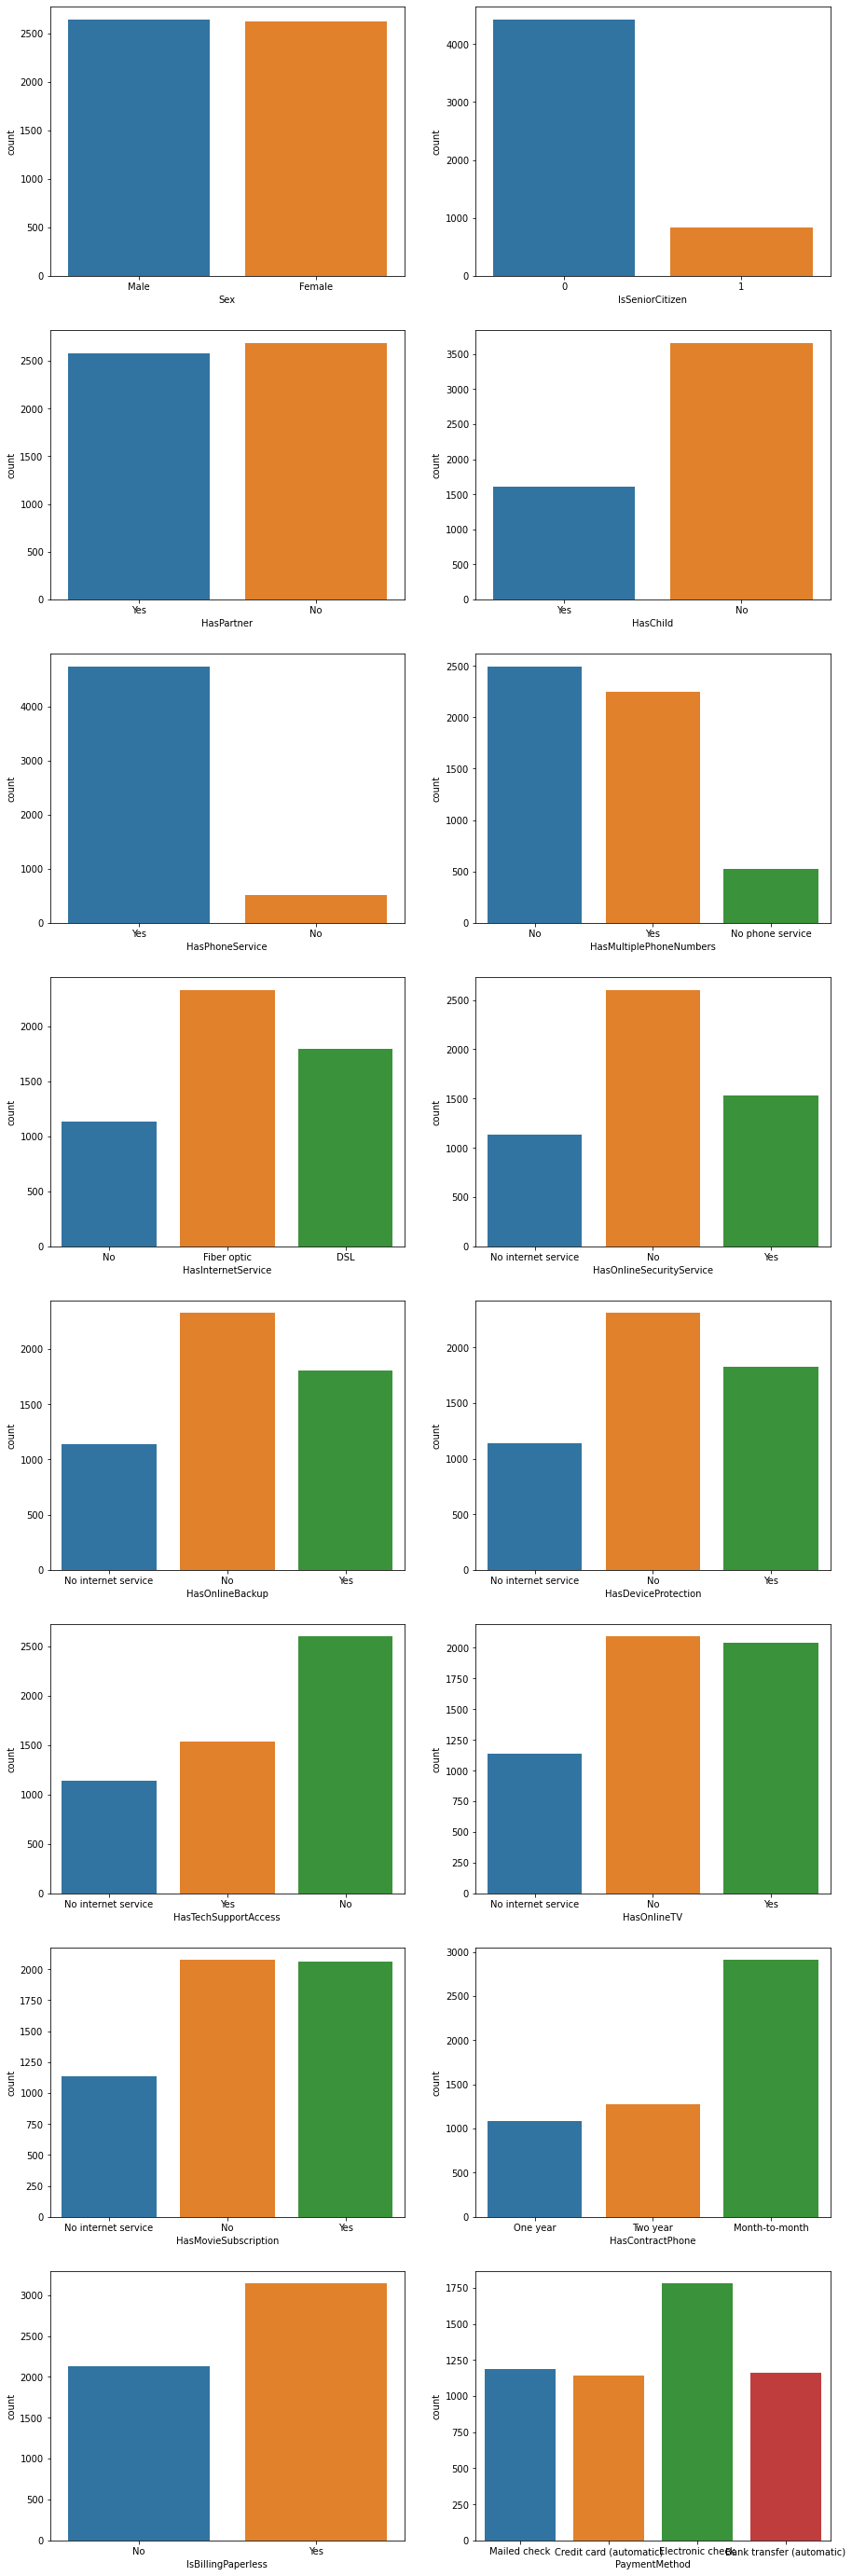

In [27]:
_, axes = plt.subplots(8, 2, figsize=(15, 50))
for i, cat_col in enumerate(cat_cols):
    sns.countplot(x=cat_col, data=data, ax=axes[int(i / 2), i % 2])

### Целевая переменная

In [28]:
pd.DataFrame({
    'count': data['Churn'].value_counts(),
    'frequency(%)': (data['Churn'].value_counts() / data.shape[0]) * 100
})

,count,frequency(%)
0,3894,73.917995
1,1374,26.082005


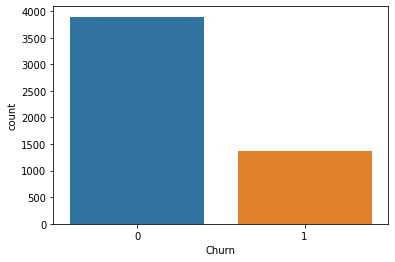

In [29]:
sns.countplot(data=data, x='Churn')

Классы являются несбалансированными, объекты класса 1 составляют 26% тренировочной выборки.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

- пустые строки в колонке "TotalSpent" были заменены на 0 выше (возможно, можно вместо 0 использовать соответствующие значения из колонки "MonthlySpending")
- значения переменных "Sex", "HasPartner", "HasChild", "HasPhoneService", "IsBillingPaperless" поменяем с "No"/"Yes" на 0/1

In [30]:
data["Sex"] = data["Sex"].map({'Male': 0, 'Female': 1})
for col in ["HasPartner", "HasChild", "HasPhoneService", "IsBillingPaperless"]:
  data[col] = data[col].map({"No": 0, "Yes": 1})

In [31]:
# повторим для test
data_test["Sex"] = data_test["Sex"].map({'Male': 0, 'Female': 1})
for col in ["HasPartner", "HasChild", "HasPhoneService", "IsBillingPaperless"]:
  data_test[col] = data_test[col].map({"No": 0, "Yes": 1})

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [32]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

### Предобработка данных
Сделаем one-hot encoding для колонок 
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'PaymentMethod':

In [33]:
columns_to_encode = ['HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'PaymentMethod']
data = pd.get_dummies(data, columns=columns_to_encode)
# test
data_test = pd.get_dummies(data_test, columns=columns_to_encode)

### Обучение

In [34]:
X = data.drop(columns=["Churn"])
y = data["Churn"]

In [35]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
grid = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]}
clf = GridSearchCV(pipeline, grid, scoring='roc_auc')
clf.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
                                                   0.001]},
             scoring='roc_auc')

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [36]:
print(f'best score: {clf.best_score_}')
print(f'best parameters: {clf.best_params_}')

best score: 0.8445729609610219
best parameters: {'logisticregression__C': 10}


Сделаем предсказания с помощью обученной модели:

In [37]:
best_model_lr = clf.best_estimator_
submission = pd.read_csv(path_to_submission)

submission['Churn'] = best_model_lr.predict_proba(data_test)[:,1]
submission.to_csv('./my_submission_lr.csv', index=False)

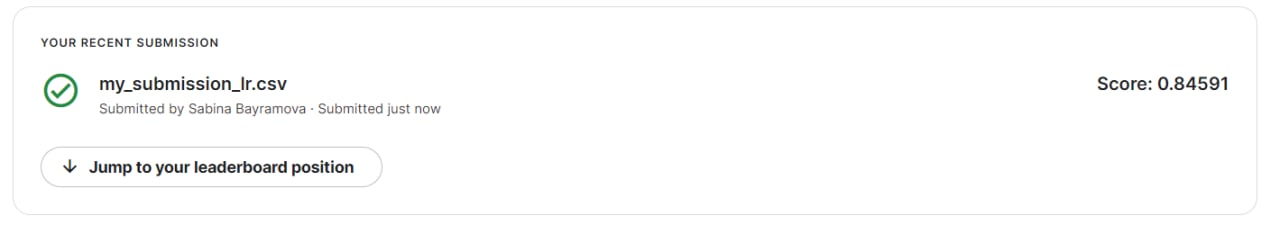

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [39]:
# !pip install catboost

In [40]:
import catboost

In [52]:
data = pd.read_csv(path_to_train)
data_test = pd.read_csv(path_to_test)

# удалим дубликаты
data = data[data.duplicated() == False]

# заменим пустые значения в столбце "TotalSpent"
data['TotalSpent'] = data['TotalSpent'].apply(lambda x: 0 if x == " " else x)
data_test['TotalSpent'] = data_test['TotalSpent'].apply(lambda x: 0 if x == " " else x)
data['TotalSpent'] = data['TotalSpent'].astype(float)
data_test['TotalSpent'] = data_test['TotalSpent'].astype(float)

X = data.drop(columns="Churn")
y = data["Churn"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [64]:
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols, verbose=False, random_state=42)
boosting_model.fit(X_train, y_train)

In [65]:
y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(f"train auc: {train_auc}")
print(f"test auc: {test_auc}")

train auc: 0.8920332206376952
test auc: 0.8447952010238798


Catboost со стандартными параметрами на отложенно тестовой выборке показывает auc 0.8447952010238798 (логистическая регрессия показывала 0.8445729609610219 на кросс-валидации)

In [67]:
boosting_model.get_all_params()["learning_rate"]

0.019040999934077263

In [70]:
n_estim = np.arange(100, 1100, 100)
learning_rates = [0.001, 0.01, 0.1, 0.019040999934077263]
best_train_auc = 0
best_test_auc = 0
best_n = 100
best_lr = 0.001
best_catboost_model = catboost.CatBoostClassifier(n_estimators=best_n, learning_rate=best_lr, cat_features=cat_cols, verbose=False, random_state=42)
for n in n_estim:
  for lr in learning_rates:
    boosting_model = catboost.CatBoostClassifier(n_estimators=n, learning_rate=lr, cat_features=cat_cols, verbose=False, random_state=42)
    boosting_model.fit(X_train, y_train)

    y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
    y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

    train_auc = roc_auc_score(y_train, y_train_predicted)
    test_auc = roc_auc_score(y_test, y_test_predicted)
    print(f"n: {n}, lr: {lr}")
    print(f"train auc: {train_auc}")
    print(f"test auc: {test_auc}")
    if test_auc > best_test_auc:
      best_train_auc = train_auc
      best_test_auc = test_auc
      best_n = n
      best_lr = lr
      best_catboost_model = boosting_model

n: 100, lr: 0.001
train auc: 0.8202387802956861
test auc: 0.8167973371759516
n: 100, lr: 0.01
train auc: 0.8354705734227277
test auc: 0.8291101361336568
n: 100, lr: 0.1
train auc: 0.8638485623904179
test auc: 0.8433219926984112
n: 100, lr: 0.019040999934077263
train auc: 0.8459233308112885
test auc: 0.8314626656783894
n: 200, lr: 0.001
train auc: 0.8427379909962702
test auc: 0.8345448937218306
n: 200, lr: 0.01
train auc: 0.8576650573850723
test auc: 0.8413170482429689
n: 200, lr: 0.1
train auc: 0.8945252668154487
test auc: 0.8405919535202773
n: 200, lr: 0.019040999934077263
train auc: 0.8632146311047583
test auc: 0.8433173889223942
n: 300, lr: 0.001
train auc: 0.8442487262011936
test auc: 0.8340891198961389
n: 300, lr: 0.01
train auc: 0.8617620856617788
test auc: 0.8427695395763605
n: 300, lr: 0.1
train auc: 0.910489488759702
test auc: 0.8391601791789626
n: 300, lr: 0.019040999934077263
train auc: 0.8669362841161298
test auc: 0.8436580683476587
n: 400, lr: 0.001
train auc: 0.8449821810

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [72]:
print(f"best test auc: {best_test_auc}")
print(f"best n_estimators: {best_n}, best lr: {best_lr}")

best test auc: 0.845476559874409
best n_estimators: 600, best lr: 0.019040999934077263


# Предсказания

In [74]:
best_model = best_catboost_model
best_model.fit(X, y)

In [75]:
X_test = data_test
submission = pd.read_csv(path_to_submission)

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission_catboost.csv', index=False)

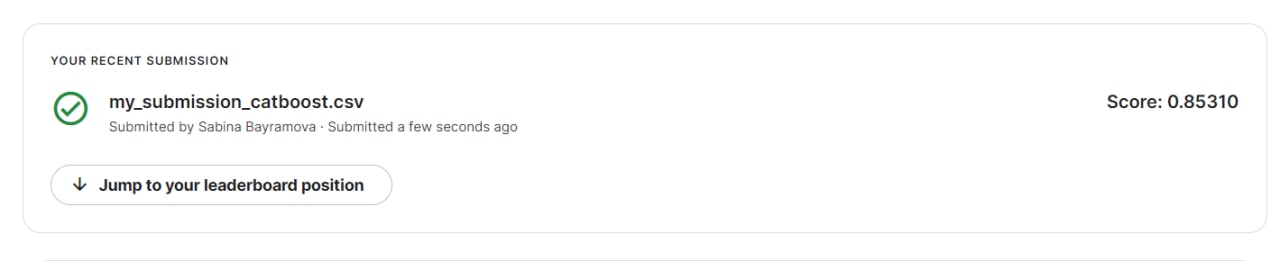

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.